In [1]:
import pandas as pd

import numpy as np
import itertools
import category_encoders as ce

from numpy import mean
from numpy import std
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import shapiro, normaltest
import category_encoders as ce
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
#df = pd.read_csv('bank updated.csv')              Old .csv with numeric pdays.

df = pd.read_csv('bank updated categories.csv')

col_names = ['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome',
             'sub_term_deposit']
df.columns = col_names
df.head()

,age,job,martial,education,cred_in_default,balance,housing,loan,contact,last_contact_day,last_contact_month,last_contact_dur,num_of_contacts_during_campaign,past_days,prev_contacts,prev_outcome,sub_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,No Contact,0,unknown,no
1,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,No Contact,0,unknown,no
2,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,No Contact,0,unknown,no
3,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,No Contact,0,unknown,no
4,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,No Contact,0,unknown,no


In [6]:
print("Bank data set dimensions (observations, features): {}".format(df.shape))
print(df.dtypes)

Bank data set dimensions (observations, features): (4521, 17)
age                                 int64
job                                object
martial                            object
education                          object
cred_in_default                    object
balance                             int64
housing                            object
loan                               object
contact                            object
last_contact_day                    int64
last_contact_month                 object
last_contact_dur                    int64
num_of_contacts_during_campaign     int64
past_days                          object
prev_contacts                       int64
prev_outcome                       object
sub_term_deposit                   object
dtype: object


In [7]:
print("\n\nsummary statistics of the Bank dataset:\n\n", df.describe())



summary statistics of the Bank dataset:

                age       balance  last_contact_day  last_contact_dur  \
count  4521.000000   4521.000000       4521.000000       4521.000000   
mean     41.170095   1422.657819         15.915284        263.961292   
std      10.576211   3009.638142          8.247667        259.856633   
min      19.000000  -3313.000000          1.000000          4.000000   
25%      33.000000     69.000000          9.000000        104.000000   
50%      39.000000    444.000000         16.000000        185.000000   
75%      49.000000   1480.000000         21.000000        329.000000   
max      87.000000  71188.000000         31.000000       3025.000000   

       num_of_contacts_during_campaign  prev_contacts  
count                      4521.000000    4521.000000  
mean                          2.793630       0.542579  
std                           3.109807       1.693562  
min                           1.000000       0.000000  
25%                        

In [8]:
print("Bank data set dimensions : {}".format(df.shape))

Bank data set dimensions : (4521, 17)


In [9]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f'\nTotal duplicate rows: {duplicate_count}')
print('\nRows with missing values:')
print(df.isnull().sum())


Total duplicate rows: 0

Rows with missing values:
age                                0
job                                0
martial                            0
education                          0
cred_in_default                    0
balance                            0
housing                            0
loan                               0
contact                            0
last_contact_day                   0
last_contact_month                 0
last_contact_dur                   0
num_of_contacts_during_campaign    0
past_days                          0
prev_contacts                      0
prev_outcome                       0
sub_term_deposit                   0
dtype: int64


In [10]:
import pandas as pd
from scipy.stats import zscore

# Specify the columns for which you want to calculate z-scores
selected_columns = ['age', 'balance', 'last_contact_day', 'last_contact_dur','num_of_contacts_during_campaign' , 'prev_contacts']

# Calculate z-scores for selected columns
z_scores = df[selected_columns].apply(zscore)

# Set threshold values for outlier detection
threshold_1 = 1.5
threshold_3 = 3

# Identify outliers based on the specified thresholds
outliers_1 = (z_scores > threshold_1) | (z_scores < -threshold_1)
outliers_3 = (z_scores > threshold_3) | (z_scores < -threshold_3)

# Display outliers
print("Outliers with threshold of 1.5:")
print(outliers_1.any())
print("\nOutliers with threshold of 3.0:")
print(outliers_3.any())


Outliers with threshold of 1.5:
age                                True
balance                            True
last_contact_day                   True
last_contact_dur                   True
num_of_contacts_during_campaign    True
prev_contacts                      True
dtype: bool

Outliers with threshold of 3.0:
age                                 True
balance                             True
last_contact_day                   False
last_contact_dur                    True
num_of_contacts_during_campaign     True
prev_contacts                       True
dtype: bool


In [11]:
# Identify outliers based on the specified threshold
outliers_3 = (z_scores > threshold_3) | (z_scores < -threshold_3)

# Count the rows that contain any outliers
outlier_rows_3 = outliers_3.any(axis=1)
outlier_count_3 = outlier_rows_3.sum()

# Display the count of rows with outliers
print(f"Count of rows with z-score threshold of {threshold_3}: {outlier_count_3}")

Count of rows with z-score threshold of 3: 391


In [12]:
# Filter the rows with outliers
outlier_data_3 = df[outlier_rows_3]

# Print the first 6 rows of the data that are labeled as z-score 3 outliers
print(outlier_data_3.head())

    age          job   martial  education cred_in_default  balance housing  \
27   78      retired  divorced    primary              no      229      no   
29   23     services    single   tertiary              no      363     yes   
38   37   technician    single  secondary              no      228     yes   
50   56       admin.   married  secondary              no    16873      no   
75   57  blue-collar   married  secondary              no    14093      no   

   loan    contact  last_contact_day last_contact_month  last_contact_dur  \
27   no  telephone                22                oct                97   
29   no    unknown                30                may                16   
38   no   cellular                20                aug              1740   
50   no   cellular                 7                oct               223   
75   no   cellular                11                aug               231   

    num_of_contacts_during_campaign   past_days  prev_contacts prev_

In [13]:
# Filter the rows with outliers
outlier_data_3 = df[outlier_rows_3]

# Print the first 6 rows of the data that are labeled as z-score 3 outliers
print(outlier_data_3.head(6))

# Export the outlier data to an Excel spreadsheet
output_file = "outliers_3.xlsx"
outlier_data_3.to_excel(output_file, index=False)

print(f"Outlier data has been exported to {output_file}")

    age            job   martial  education cred_in_default  balance housing  \
27   78        retired  divorced    primary              no      229      no   
29   23       services    single   tertiary              no      363     yes   
38   37     technician    single  secondary              no      228     yes   
50   56         admin.   married  secondary              no    16873      no   
75   57    blue-collar   married  secondary              no    14093      no   
99   34  self-employed    single   tertiary              no      462      no   

   loan    contact  last_contact_day last_contact_month  last_contact_dur  \
27   no  telephone                22                oct                97   
29   no    unknown                30                may                16   
38   no   cellular                20                aug              1740   
50   no   cellular                 7                oct               223   
75   no   cellular                11                au

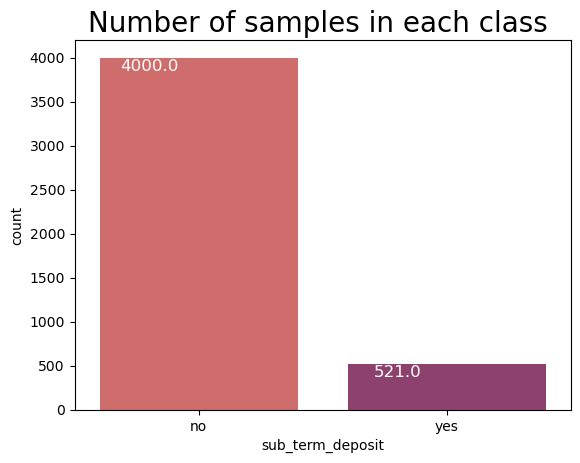

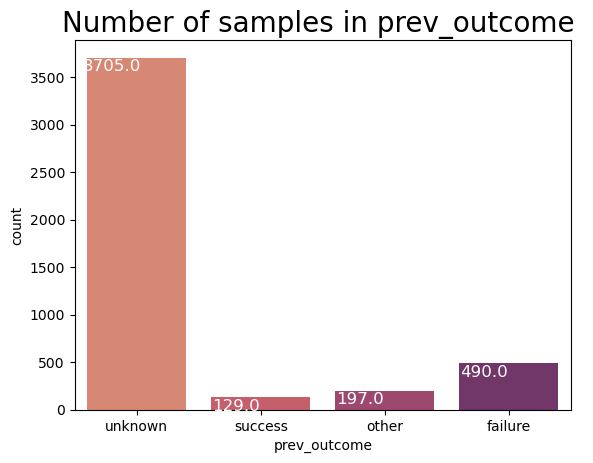

In [14]:
ax = sns.countplot(x="sub_term_deposit", data=df, palette="flare")
ax.set_title('Number of samples in each class ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

ax = sns.countplot(x="prev_outcome", data=df, palette="flare")
ax.set_title('Number of samples in prev_outcome ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

last_contact_month  apr  aug  dec  feb  jan  jul  jun  mar   may  nov  oct  \
sub_term_deposit                                                             
no                  237  554   11  184  132  645  476   28  1305  350   43   
yes                  56   79    9   38   16   61   55   21    93   39   37   

last_contact_month  sep  
sub_term_deposit         
no                   35  
yes                  17  
job               admin.  blue-collar  entrepreneur  housemaid  management  \
sub_term_deposit                                                             
no                   420          877           153         98         838   
yes                   58           69            15         14         131   

job               retired  self-employed  services  student  technician  \
sub_term_deposit                                                          
no                    176            163       379       65         685   
yes                    54             20     

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No Contact'),
  Text(1, 0, 'Under 100'),
  Text(2, 0, 'Under 200'),
  Text(3, 0, 'Under 300'),
  Text(4, 0, 'Under 400'),
  Text(5, 0, 'Under 500'),
  Text(6, 0, 'Under 600'),
  Text(7, 0, 'Under 700'),
  Text(8, 0, 'Under 800'),
  Text(9, 0, 'Under 900')])

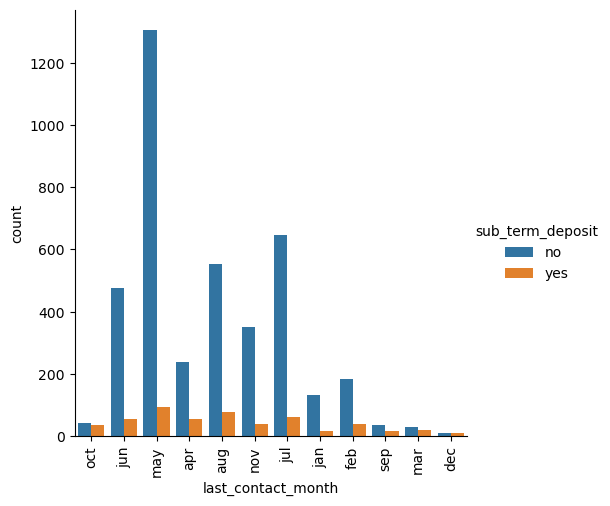

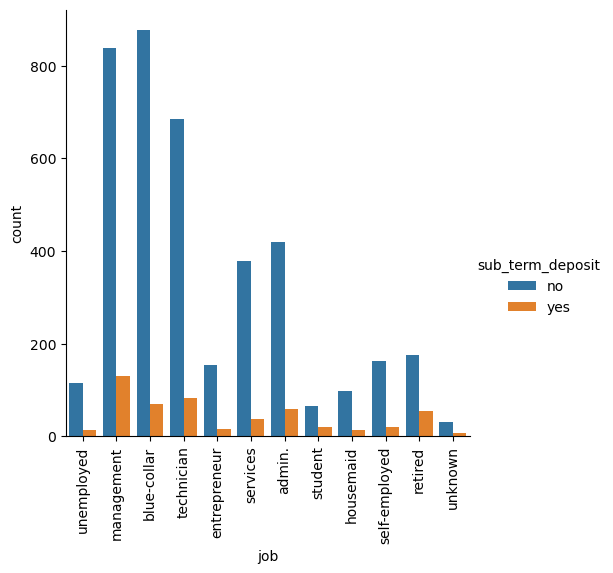

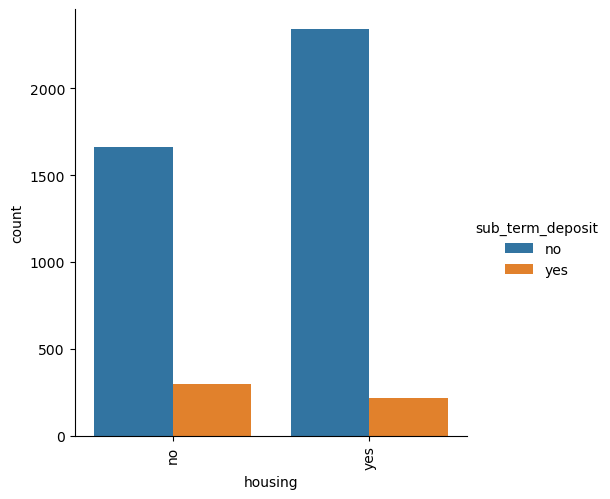

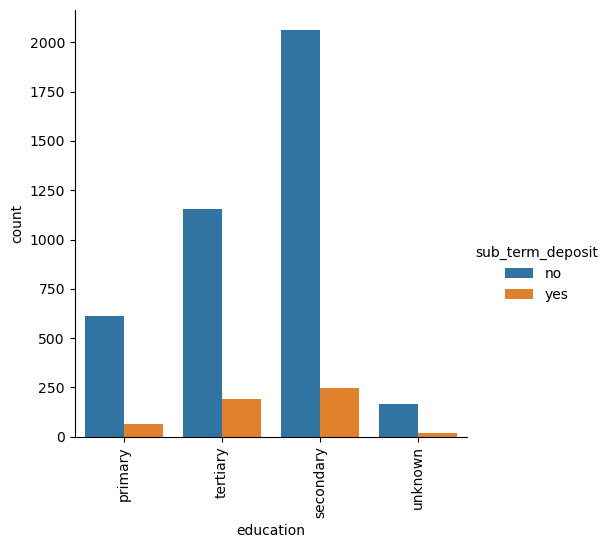

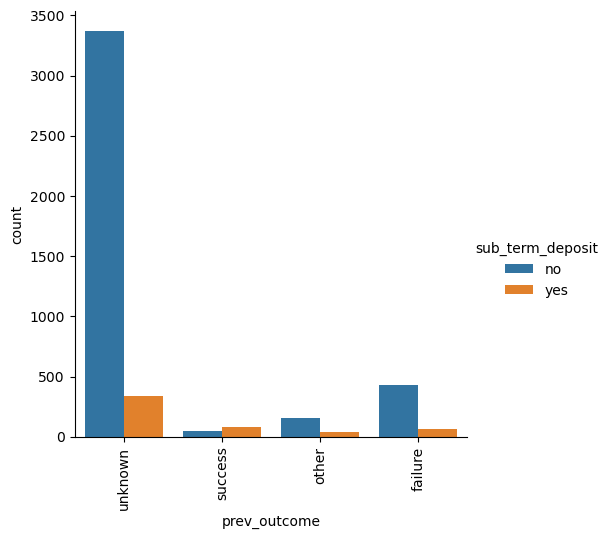

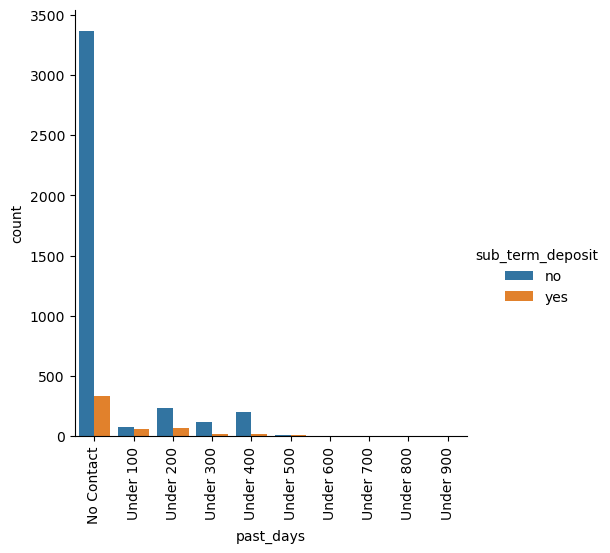

In [15]:
print(pd.crosstab(df['sub_term_deposit'], df.last_contact_month))
sns.catplot(data=df, x='last_contact_month', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.job))
sns.catplot(data=df, x='job', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.housing))
sns.catplot(data=df, x='housing', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.education))
sns.catplot(data=df, x='education', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.prev_outcome))
sns.catplot(data=df, x='prev_outcome', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.prev_outcome))
sns.catplot(data=df, x='past_days', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder

# Load the dataset
df = pd.read_csv('bank updated categories.csv')

# Ensure column names match
print(df.columns)

X = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome']]
y = df['y'] 

# Define the columns to encode
cols_to_encode = ['age', 'job', 'marital', 'education', 'balance',
                  'housing', 'loan', 'contact', 'day', 'month', 
                  'duration', 'campaign', 'pdays', 'previous', 'poutcome']

# Filter cols_to_encode to include only those present in X
cols_to_encode = [col for col in cols_to_encode if col in X.columns]

# Create the encoder
encoder = OrdinalEncoder(cols=cols_to_encode)
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=2)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


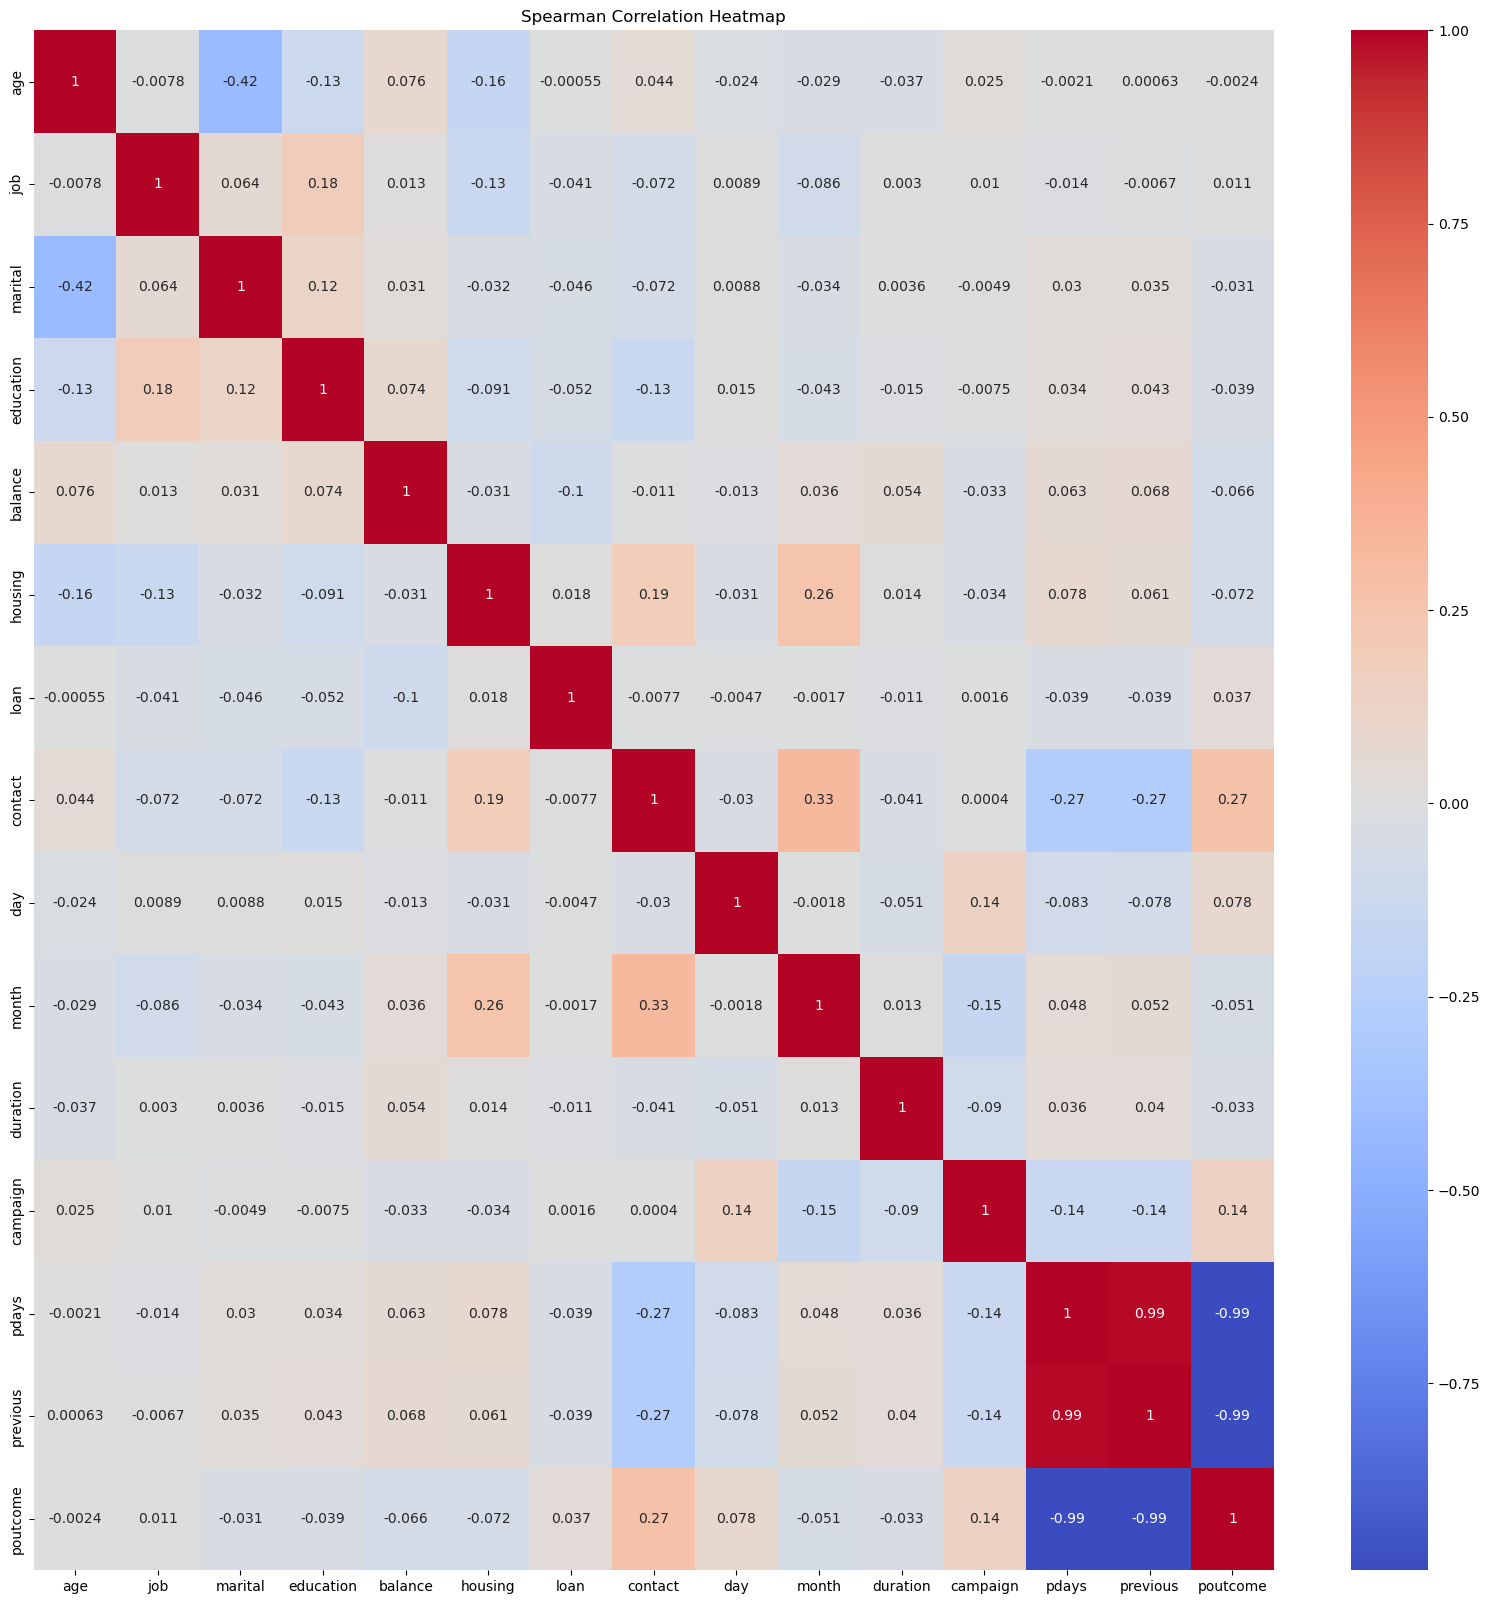

In [17]:
##Correlation Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Load the dataset
df = pd.read_csv('bank updated categories.csv')

# Define features and target
X = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome']]
y = df['y']

# Encode categorical variables
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Convert the encoded features back to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=X.columns)

# Compute the Spearman correlation matrix
corrmat = X_encoded_df.corr(method='spearman')

# Plot heatmap with a different colormap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="coolwarm")  # Changed colormap to 'coolwarm'
plt.title('Spearman Correlation Heatmap')
plt.show()

In [18]:
# Find features with correlation above 0.5 or below -0.5
high_corr = corrmat[(corrmat > 0.5) | (corrmat < -0.5)]
high_corr = high_corr.stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  # Remove self-correlations
high_corr = high_corr.rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})

# Print the features with high correlation
print("Features with Spearman correlation above 0.5 or below -0.5:")
print(high_corr)

Features with Spearman correlation above 0.5 or below -0.5:
    Feature1  Feature2  Correlation
13     pdays  previous     0.986688
14     pdays  poutcome    -0.991684
15  previous     pdays     0.986688
17  previous  poutcome    -0.988017
18  poutcome     pdays    -0.991684
19  poutcome  previous    -0.988017


In [19]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


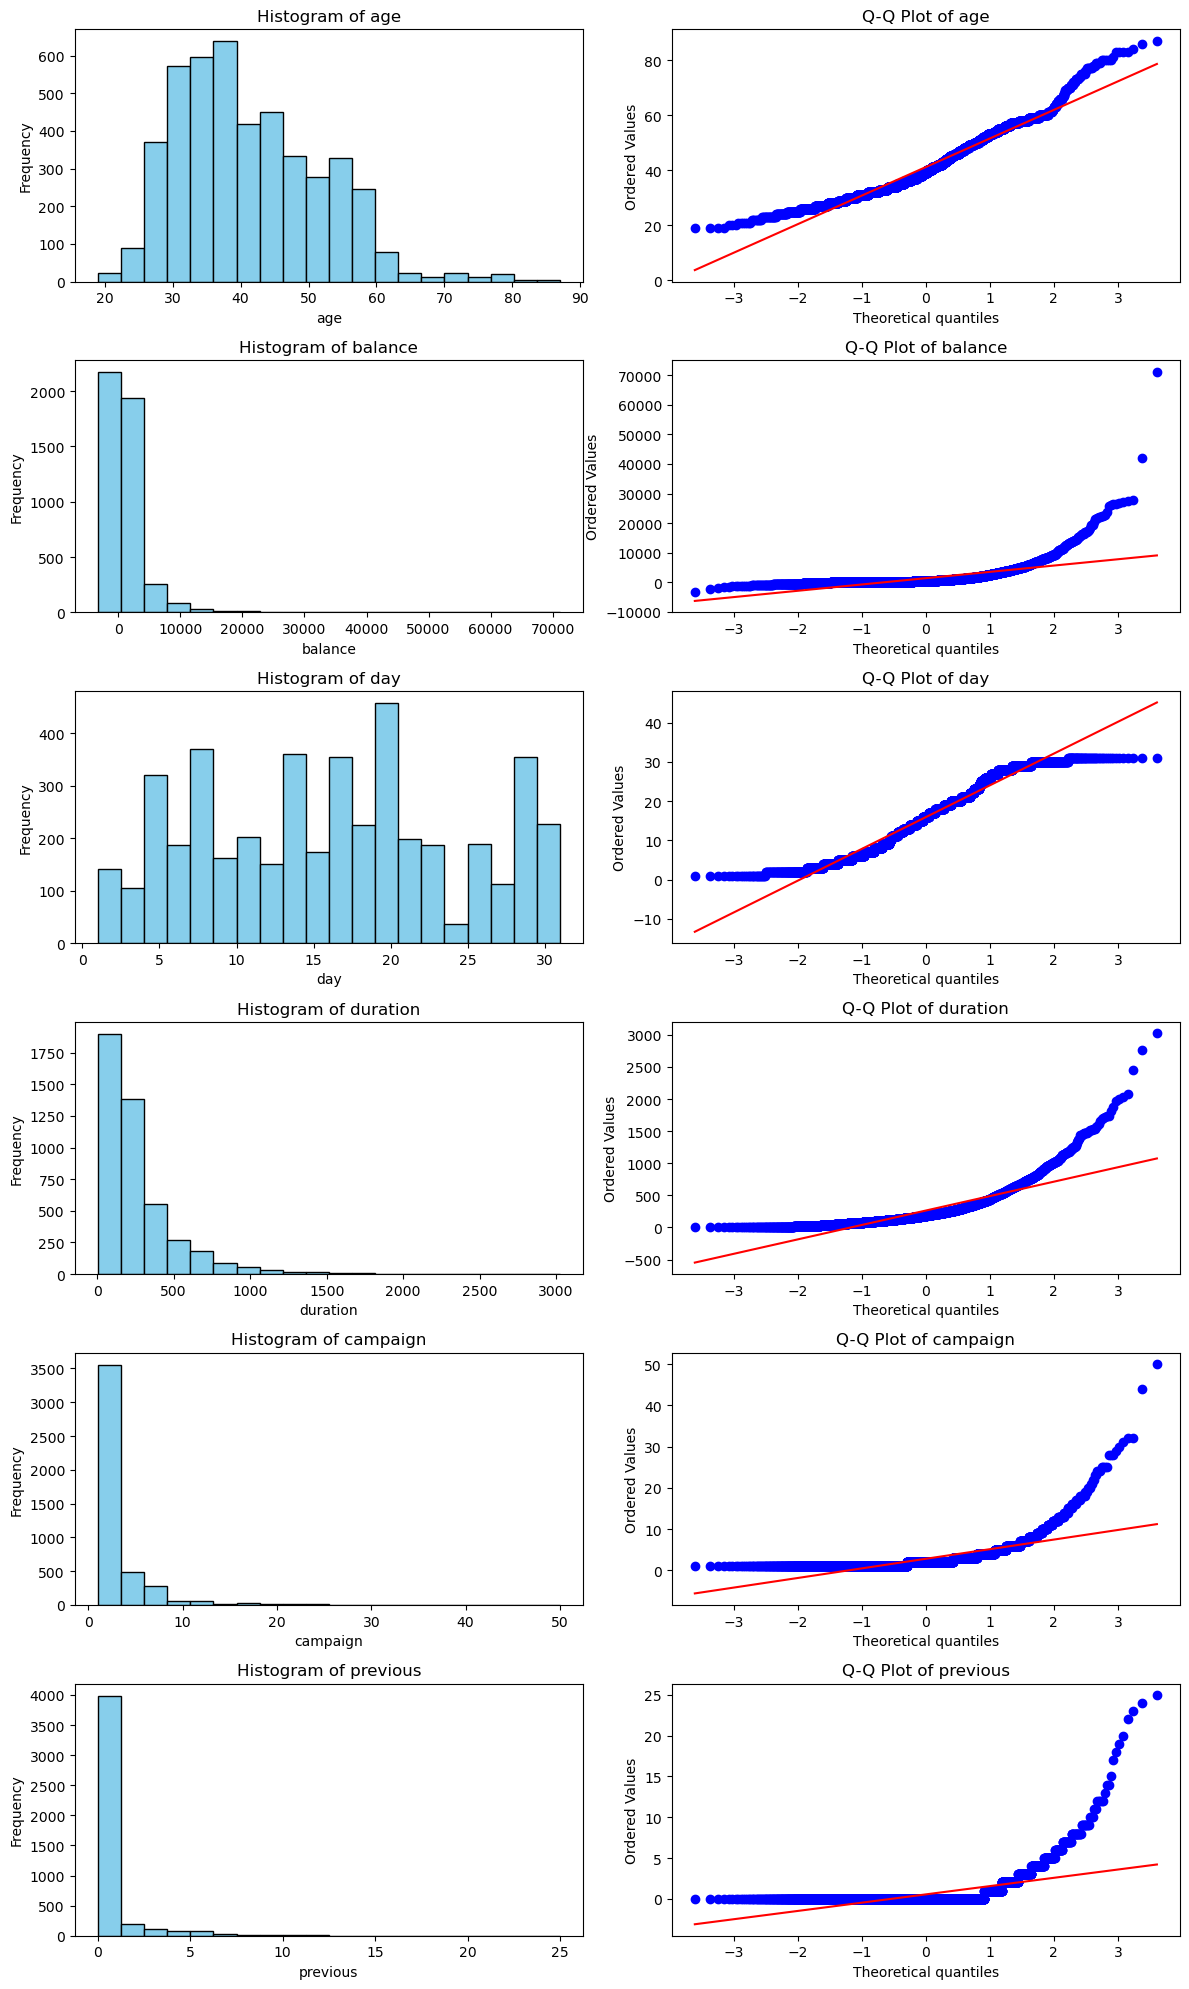

In [20]:
# Task 2 Visualize the distribution of the input variables within the subset of your dataset

import matplotlib.pyplot as plt
import scipy.stats as stats

# Prepare the plot grid
fig, axs = plt.subplots(6, 2, figsize=(12, 20))  # 6 rows for histograms and Q-Q plots of 5 features

# Loop over each feature to create a histogram and a Q-Q plot
for index, feature in enumerate(['age', 'balance','day', 'duration', 'campaign','previous']):
    # Histogram
    axs[index, 0].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axs[index, 0].set_title(f'Histogram of {feature}')
    axs[index, 0].set_xlabel(f'{feature}')
    axs[index, 0].set_ylabel('Frequency')

    # Q-Q plot
    stats.probplot(df[feature], dist="norm", plot=axs[index, 1])
    axs[index, 1].set_title(f'Q-Q Plot of {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [21]:
##Univariate Feature selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from category_encoders import OrdinalEncoder  # Import OrdinalEncoder

# Load the dataset
df = pd.read_csv('bank updated categories.csv')

# Define features and target
X = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome']]
y = df['y'] 

# Define the columns to encode
cols_to_encode = ['age', 'job', 'marital', 'education', 'balance',
                  'housing', 'loan', 'contact', 'day', 'month', 
                  'duration', 'campaign', 'pdays', 'previous', 'poutcome']

# Filter cols_to_encode to include only those present in X
cols_to_encode = [col for col in cols_to_encode if col in X.columns]

# Create the encoder
encoder = OrdinalEncoder(cols=cols_to_encode)
X_enc = encoder.fit_transform(X)

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_enc, y)

# Create DataFrame for feature scores and column names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_enc.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Print 10 best features
print(featureScores.nlargest(10, 'Score'))

       Specs         Score
10  duration  31838.561234
4    balance  16119.343910
13  previous    194.701511
0        age    146.292672
11  campaign     71.552534
12     pdays     40.596033
8        day     33.790713
1        job     26.814178
9      month     21.235804
14  poutcome     21.080894


       Specs         Score
10  duration  31838.561234
4    balance  16119.343910
13  previous    194.701511
0        age    146.292672
11  campaign     71.552534
12     pdays     40.596033
8        day     33.790713
1        job     26.814178
9      month     21.235804
14  poutcome     21.080894


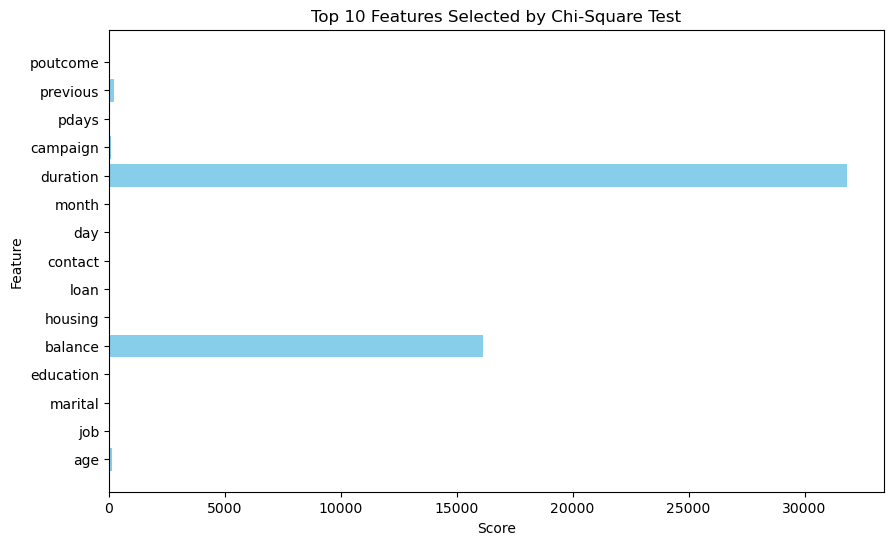

In [22]:
#Chi Square
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from category_encoders import OrdinalEncoder

# Load the dataset
df = pd.read_csv('bank updated categories.csv')

# Define features and target
X = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome']]
y = df['y'] 

# Define the columns to encode
cols_to_encode = ['age', 'job', 'marital', 'education', 'balance',
                  'housing', 'loan', 'contact', 'day', 'month', 
                  'duration', 'campaign', 'pdays', 'previous', 'poutcome']

# Filter cols_to_encode to include only those present in X
cols_to_encode = [col for col in cols_to_encode if col in X.columns]

# Create the encoder
encoder = OrdinalEncoder(cols=cols_to_encode)
X_enc = encoder.fit_transform(X)

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_enc, y)

# Create DataFrame for feature scores and column names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_enc.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Print 10 best features
print(featureScores.nlargest(10, 'Score'))

# Plot the scores
plt.figure(figsize=(10, 6))
plt.barh(featureScores['Specs'], featureScores['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Features Selected by Chi-Square Test')
plt.show()


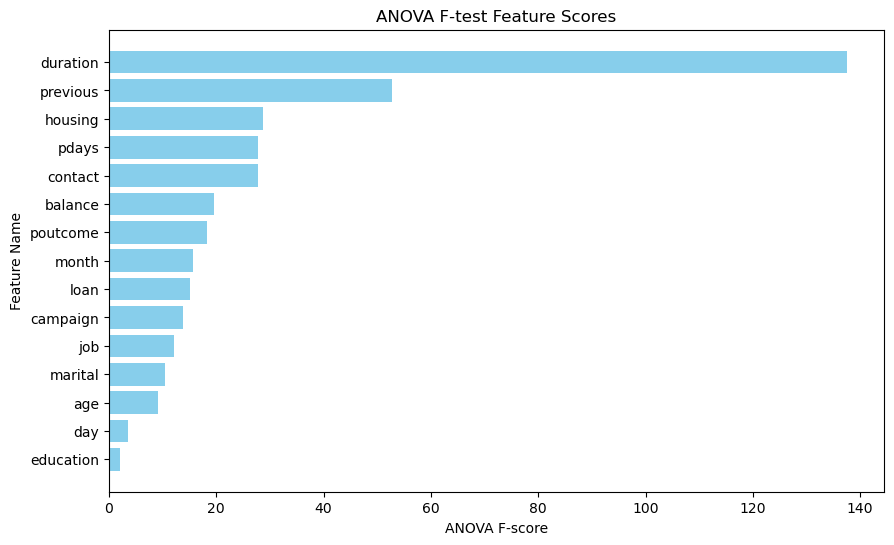

      Feature       Score
10   duration  137.557816
13   previous   52.653996
5     housing   28.640575
12      pdays   27.723391
7     contact   27.688587
4     balance   19.540159
14   poutcome   18.186281
9       month   15.622652
6        loan   15.062254
11   campaign   13.704258
1         job   12.150524
2     marital   10.363489
0         age    9.147933
8         day    3.528203
3   education    1.965069


In [23]:
#ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt

# ANOVA FEATURE SELECTION
# Ranking of all features based on ANOVA F-scores
fs = SelectKBest(score_func=f_classif, k='all') 
fs.fit(X_train, y_train)

# Create a DataFrame to store feature scores
fs_score_df = pd.DataFrame({'Feature': X_train.columns, 'Score': fs.scores_})

# Sort feature scores in descending order
fs_score_df = fs_score_df.sort_values(by='Score', ascending=False)

# Plot feature scores
feature_name = fs_score_df['Feature']
scores = fs_score_df['Score']

plt.figure(figsize=(10, 6))
plt.barh(feature_name, scores, color='skyblue')
plt.xlabel('ANOVA F-score')
plt.ylabel('Feature Name')
plt.title('ANOVA F-test Feature Scores')
plt.gca().invert_yaxis()
plt.show()

# Display feature ranking based on ANOVA feature selection
print(fs_score_df)

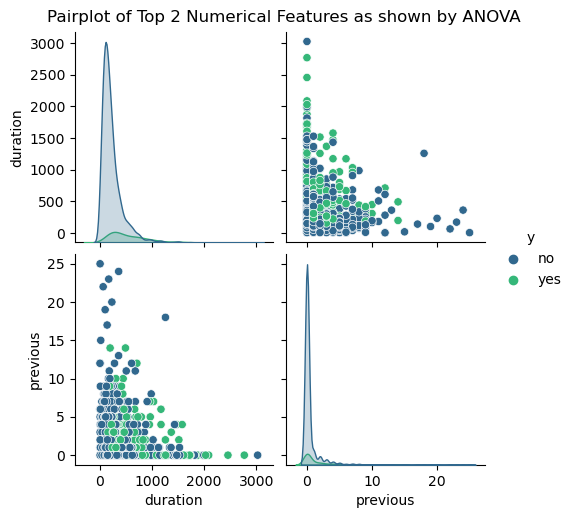

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming fs_score_df contains the feature scores dataframe
top_6_features = fs_score_df['Feature'].head(5).tolist()  # Extracting top 6 features
top_6_features.append('y')  # Adding the target variable

# Extracting data for top 6 features and the target variable
data_top_6 = df[top_6_features]

# Plotting using pairplot
sns.pairplot(data_top_6, hue='y', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Top 2 Numerical Features as shown by ANOVA', y=1.02)
plt.show()

[0.10826697 0.05336019 0.0279236  0.0331096  0.10980565 0.02020604
 0.01027433 0.02126021 0.10000041 0.0823424  0.28729546 0.03993535
 0.03372059 0.02740816 0.04509104]


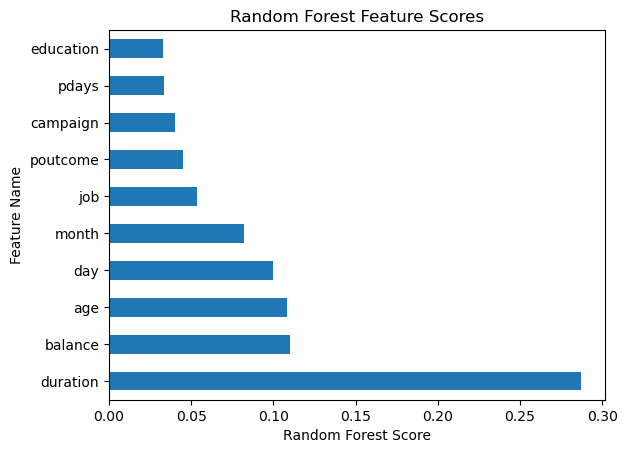

In [25]:
##Feature Selection using Random Forest
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bank updated categories.csv')

# Define features and target
X = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
          'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
          'previous', 'poutcome']]
y = df['y']

# Encode categorical variables
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_encoded, y)

# Print feature importances
print(model.feature_importances_) 

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Random Forest Score')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Scores')
plt.show()

In [26]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [27]:
# Task 4: Fit a Gaussian Naive Bayes model
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define features and target
X = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y = df['y']

# Encode categorical variables
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store the accuracies from each fold
accuracies = []

# Execute the k-fold cross-validation
for train_index, test_index in kf.split(X_encoded):
    # Correctly index the rows for training and testing data
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Training the model
    gnb.fit(X_train, y_train)

    # Predicting the labels
    y_pred = gnb.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculating the average accuracy across all folds
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2%}')

# Optionally, print accuracy for each fold
for fold, acc in enumerate(accuracies, 1):
    print(f'Fold {fold}: Accuracy = {acc:.2%}')

Average Accuracy: 84.10%
Fold 1: Accuracy = 83.54%
Fold 2: Accuracy = 85.51%
Fold 3: Accuracy = 83.08%
Fold 4: Accuracy = 83.63%
Fold 5: Accuracy = 84.73%


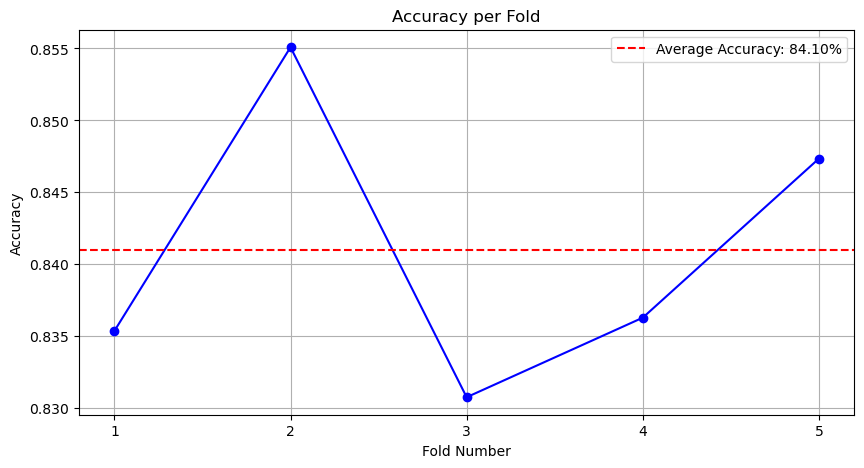

In [28]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracies) + 1))  # Ensure ticks correspond to fold numbers
plt.grid(True)

# Highlight the average accuracy
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2%}')
plt.legend()

plt.show()

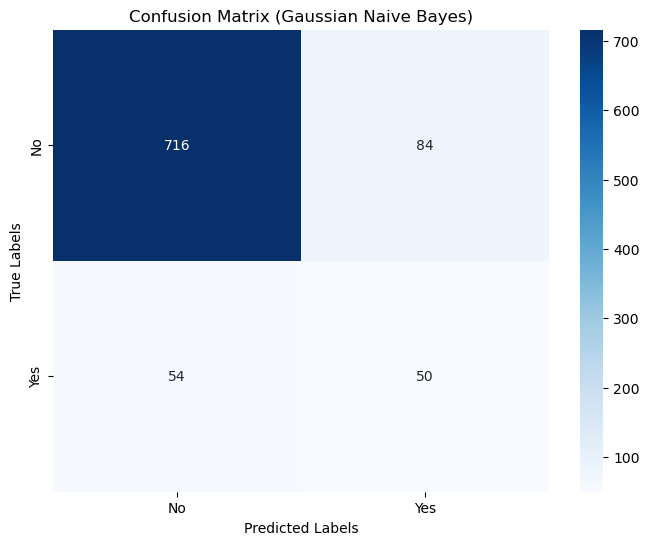

In [29]:
# Task 4.1. Generate the confusion matrix for your model and provide matrix

# Define label names
label_names = ['No', 'Yes']

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
ax.set_title('Confusion Matrix (Gaussian Naive Bayes)')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

In [30]:
# Task 4.2: Using the classification report, provide the performance metrics of the model.

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report of Gaussian Naive Bayes Model:\n", report)

Accuracy: 0.8473451327433629
Classification Report of Gaussian Naive Bayes Model:
               precision    recall  f1-score   support

          no       0.93      0.90      0.91       800
         yes       0.37      0.48      0.42       104

    accuracy                           0.85       904
   macro avg       0.65      0.69      0.67       904
weighted avg       0.87      0.85      0.86       904



In [31]:
#KNN Process Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
#visulaization modules

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [32]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder

# Load the dataset
df = pd.read_csv('bank updated categories.csv')

# Define features and target
X = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome']]
y = df['y'] 

# Define the columns to encode
cols_to_encode = ['job', 'marital', 'education','default', 
                  'housing', 'loan', 'contact', 'month', 
                  'pdays', 'poutcome']

# Filter cols_to_encode to include only those present in X
cols_to_encode = [col for col in cols_to_encode if col in X.columns]

# Create the encoder
encoder = OrdinalEncoder(cols=cols_to_encode)
X_enc = encoder.fit_transform(X)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
X_enc[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=42, stratify=y)

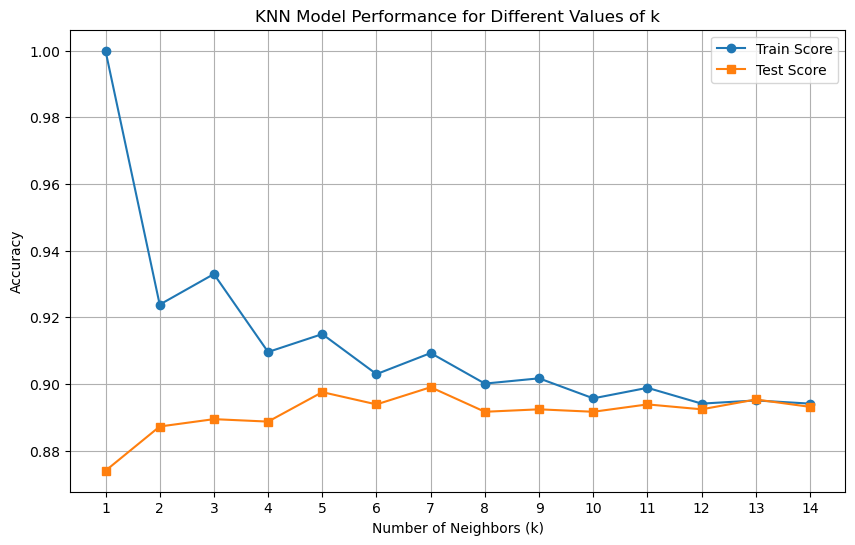

Best value of k: 7, Test Accuracy: 0.90


In [34]:
# Apply KNN Model with different values of k
k_values = range(1, 15)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker='o', label='Train Score')
plt.plot(k_values, test_scores, marker='s', label='Test Score')
plt.title('KNN Model Performance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the best value of k
best_k = k_values[test_scores.index(max(test_scores))]
print(f'Best value of k: {best_k}, Test Accuracy: {max(test_scores):.2f}')

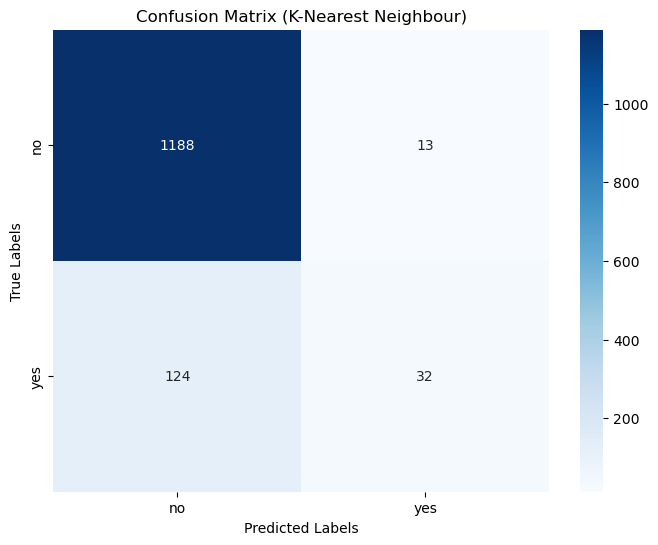


Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      1201
         yes       0.71      0.21      0.32       156

    accuracy                           0.90      1357
   macro avg       0.81      0.60      0.63      1357
weighted avg       0.88      0.90      0.87      1357



In [35]:
# Train the model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Make predictions
y_pred = knn_best.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
ax.set_title('Confusion Matrix (K-Nearest Neighbour)')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

#This code takes ages to run and produces crap results
# This code takes ages to run and produces crap results
#Plot decision boundary using k=7
from sklearn.preprocessing import LabelEncoder

# Set filler values for each feature
filler_feature_values = {i: X_test.values[:, i].mean() for i in range(X_test.shape[1])}
filler_feature_ranges = {i: X_test.values[:, i].max() - X_test.values[:, i].min() for i in range(X_test.shape[1])}

# Plot decision boundary using k=7
knn_best = KNeighborsClassifier(n_neighbors=7)
knn_best.fit(X_train, y_train_encoded)
plot_decision_regions(X_test.values, y_test_encoded, clf=knn_best, legend=2, 
                      filler_feature_values=filler_feature_values,
                      filler_feature_ranges=filler_feature_ranges,
                      X_highlight=X_test.values)
plt.title('KNN Decision Boundary (k=7)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()